In [1]:
import numpy as np, pandas as pd ,matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Part 1: Loading the Dataset; Preliminary Analysis

In [2]:
fc = pd.read_csv("forest_cover.txt", sep='\t')
fc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


In [3]:
print(fc.shape)

(15120, 13)


In [4]:
fc['Cover_Type'].value_counts().sort_index()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

### The dataset contains X rows and Y columns. We will now inspect the distribution of cover types, which are equally represented in the dataset.
We will now define a color palette for visualizations

In [6]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

### Part 2: Distribution of Cover Type by Wilderness Area 

In [7]:
fc['Wilderness_Area'].value_counts().sort_index()

Wilderness_Area
Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: count, dtype: int64

### Now we'll create a DataFrame that shows the number of regions per cover type for each wilderness area.

In [8]:
ct_by_wa = pd.crosstab(fc['Cover_Type'], fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


### We'll visualize this as a stacked bar chart.

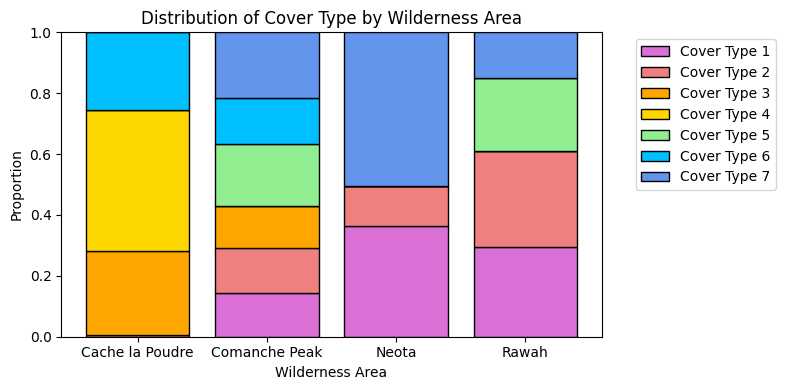

In [9]:
ct_by_wa_props = ct_by_wa / np.sum(ct_by_wa, axis=0)
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

plt.figure(figsize=[8,4])
for i in range(ct_by_wa_props.shape[0]):
    plt.bar(ct_by_wa_props.columns, ct_by_wa_props.iloc[i], bottom=bb.iloc[i], 
            color=palette[i], edgecolor='black', label=f'Cover Type {i+1}')
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Part 3: Distribution of Cover Type by Soil Type

In [10]:
# Create a crosstab to count cover types by soil types
ct_by_st = pd.crosstab(fc['Cover_Type'], fc['Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


### Convert the count data into proportions

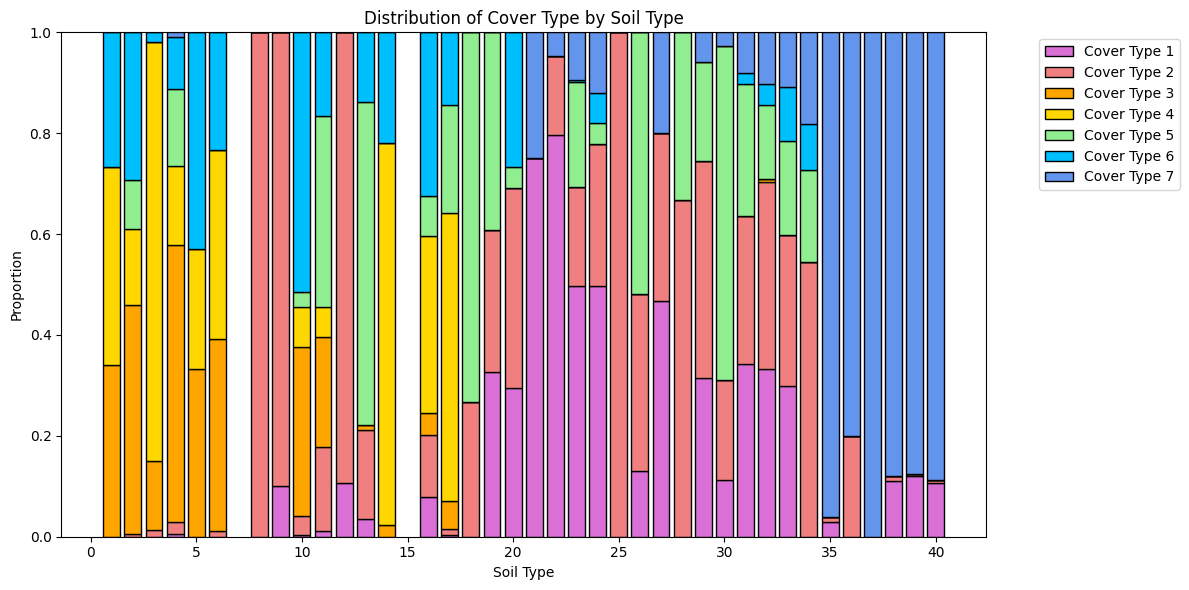

In [11]:
ct_by_st_props = ct_by_st / np.sum(ct_by_st, axis=0)
bb_st = np.cumsum(ct_by_st_props) - ct_by_st_props

# Plot a stacked bar chart for Soil Type
plt.figure(figsize=[12,6])
for i in range(ct_by_st_props.shape[0]):
    plt.bar(ct_by_st_props.columns, ct_by_st_props.iloc[i], bottom=bb_st.iloc[i], 
            color=palette[i], edgecolor='black', label=f'Cover Type {i+1}')
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Soil Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Part 4: Distribution of Elevation by Cover Type
We will explore how elevation varies among the different forest cover types

In [12]:
elevation_mean = fc.groupby('Cover_Type')['Elevation'].mean()
elevation_mean

Cover_Type
1    3128.025926
2    2922.540278
3    2398.423148
4    2223.420370
5    2786.801389
6    2423.276852
7    3362.769907
Name: Elevation, dtype: float64

### Plot histograms of elevation for each cover type

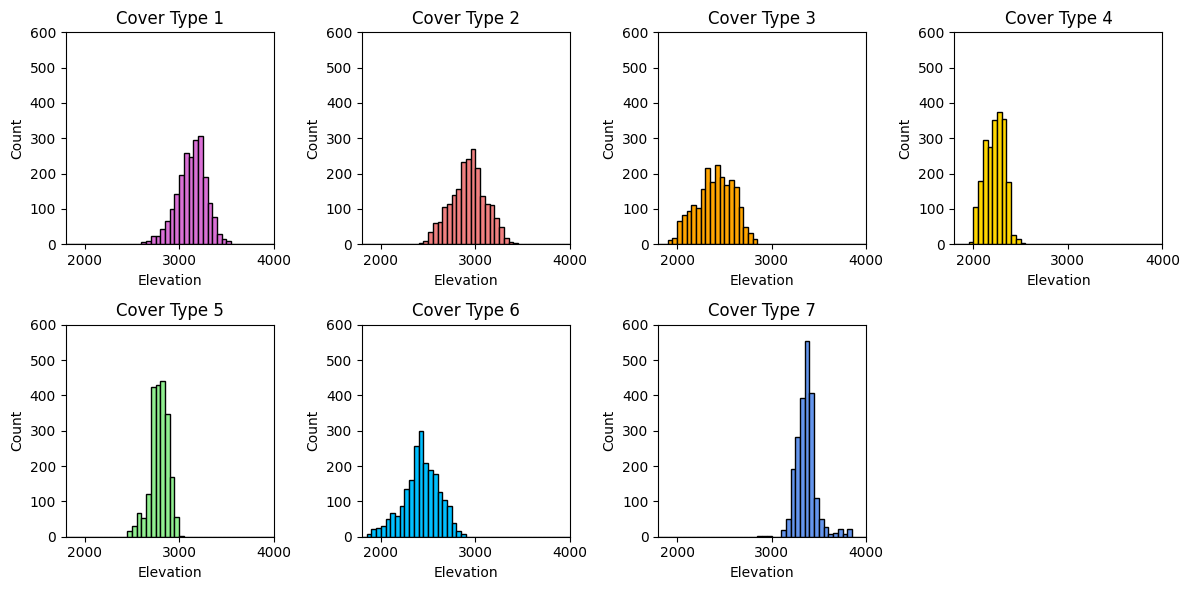

In [13]:
plt.figure(figsize=[12, 6])
for i in range(1, 8):
    plt.subplot(2, 4, i)
    plt.hist(fc[fc['Cover_Type'] == i]['Elevation'], bins=np.arange(1800, 4050, 50), 
             color=palette[i-1], edgecolor='black')
    plt.title(f'Cover Type {i}')
    plt.xlim([1800, 4000])
    plt.ylim([0, 600])
    plt.xlabel('Elevation')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Part 5: Creating Training, Validation, and Test Sets
We will now encode the categorical variables and split the dataset into training, validation, and test sets.

In [14]:
# Separate numerical and categorical features
X_num = fc[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
            'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
            'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
            'Horizontal_Distance_To_Fire_Points']].values
X_cat = fc[['Wilderness_Area', 'Soil_Type']].values
y = fc['Cover_Type'].values
print(f'Numerical Feature Array Shape:   {X_num.shape}')
print(f'Categorical Feature Array Shape: {X_cat.shape}')
print(f'Label Array Shape:               {y.shape}')

Numerical Feature Array Shape:   (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:               (15120,)


### One-hot encode categorical features

In [15]:
encoder = OneHotEncoder(sparse_output=False)
X_enc = encoder.fit_transform(X_cat)
print(f'Encoded Feature Array Shape: {X_enc.shape}')

Encoded Feature Array Shape: (15120, 42)


### Combine numerical and encoded features

In [16]:
X = np.hstack([X_num, X_enc])
print(f'Feature Array Shape: {X.shape}')

Feature Array Shape: (15120, 52)


### Split the data into training, validation, and test sets (70/15/15)

In [17]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)

print(f'Training Features Shape:   {X_train.shape}')
print(f'Validation Features Shape: {X_valid.shape}')
print(f'Test Features Shape:       {X_test.shape}')

Training Features Shape:   (10584, 52)
Validation Features Shape: (2268, 52)
Test Features Shape:       (2268, 52)


## Part 6: Logistic Regression Model
We will create a logistic regression model and evaluate its performance on the training and validation sets.

In [333]:
# Create and fit the logistic regression model
lr_mod = LogisticRegression(solver='lbfgs',max_iter=1000, penalty=None)
lr_mod.fit(X_train, y_train)

# Calculate training and validation accuracy
train_accuracy = lr_mod.score(X_train, y_train)
valid_accuracy = lr_mod.score(X_valid, y_valid)

# Print the accuracies
print(f'Training Accuracy:   {train_accuracy:.4f}')
print(f'Validation Accuracy: {valid_accuracy:.4f}')


Training Accuracy:   0.6129
Validation Accuracy: 0.6160


C:\Users\samue\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Part 7: Decision Tree Models
We will create multiple decision tree models with varying `max_depth` values and select the one with the best validation accuracy.

In [33]:
# Initialize empty lists to store accuracy scores
dt_train_acc = []
dt_valid_acc = []

# Create a range of max_depth values to test
depth_range = range(2, 31)

# Loop over the depth range
for depth in depth_range:
    np.random.seed(1)  # Set random seed inside the loop
    
    # Create and fit the decision tree model
    temp_tree = DecisionTreeClassifier(max_depth=depth)
    temp_tree.fit(X_train, y_train)
    
    # Calculate and store accuracies
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))

# Find the index of the best validation accuracy
dt_idx = np.argmax(dt_valid_acc)

# Determine the optimal max_depth and corresponding accuracies
dt_opt_depth = depth_range[dt_idx]
opt_train_acc = dt_train_acc[dt_idx]
opt_valid_acc = dt_valid_acc[dt_idx]

# Display results
print(f'Optimal value for max_depth:           {dt_opt_depth}')
print(f'Training Accuracy for Optimal Model:   {opt_train_acc:.4f}')
print(f'Validation Accuracy for Optimal Model: {opt_valid_acc:.4f}')


Optimal value for max_depth:           18
Training Accuracy for Optimal Model:   0.9804
Validation Accuracy for Optimal Model: 0.7720


### Plot the training and validation curves as a function of max_depth.

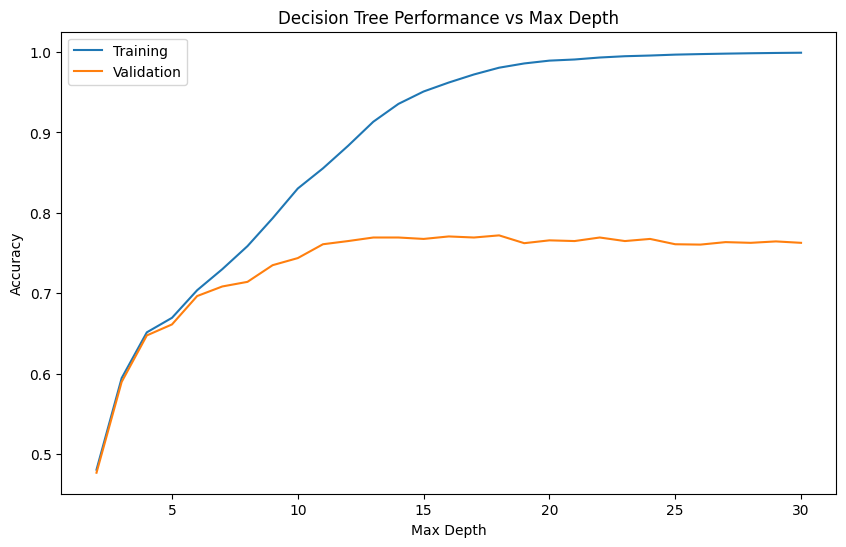

In [34]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training and validation accuracies
ax.plot(depth_range, dt_train_acc, label='Training')
ax.plot(depth_range, dt_valid_acc, label='Validation')

# Set labels and title
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Decision Tree Performance vs Max Depth')

# Add legend
ax.legend()

# Display the plot
plt.show()

## Part 8: Random Forest Models
We will create several random forest models with varying `max_depth` values and select the one with the best validation accuracy.

In [35]:
# Create empty lists to store accuracy scores
rf_train_acc = []
rf_valid_acc = []

# Loop over depth_range values
for depth in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(max_depth=depth, n_estimators=100)
    temp_forest.fit(X_train, y_train)
    
    # Calculate and store accuracies
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))

# Find index of best validation accuracy
rf_idx = np.argmax(rf_valid_acc)

# Determine optimal max_depth and corresponding accuracies
rf_opt_depth = depth_range[rf_idx]
opt_rf_train_acc = rf_train_acc[rf_idx]
opt_rf_valid_acc = rf_valid_acc[rf_idx]

# Display results
print(f'Optimal value for max_depth:           {rf_opt_depth}')
print(f'Training Accuracy for Optimal Model:   {opt_rf_train_acc:.4f}')
print(f'Validation Accuracy for Optimal Model: {opt_rf_valid_acc:.4f}')


Optimal value for max_depth:           28
Training Accuracy for Optimal Model:   1.0000
Validation Accuracy for Optimal Model: 0.8677


### Plot the training and validation curves as a function of max_depth.

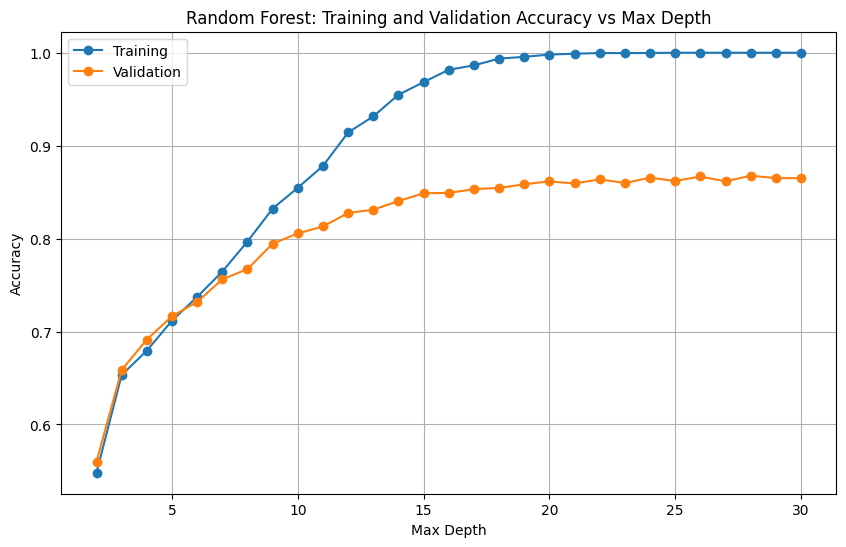

In [36]:
# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot training and validation accuracies
plt.plot(depth_range, rf_train_acc, label='Training', marker='o')
plt.plot(depth_range, rf_valid_acc, label='Validation', marker='o')

# Set labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Training and Validation Accuracy vs Max Depth')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


## Part 9: Create and Evaluate Final Model
We will now select the best model based on validation performance and evaluate it on the test set.

In [37]:
# Set random seed for reproducibility
np.random.seed(1)

# Recreate the best model (Random Forest with optimal max_depth)
final_model = RandomForestClassifier(max_depth=rf_opt_depth, random_state=42)

# Fit the model to the training set
final_model.fit(X_train, y_train)

# Calculate accuracies
train_accuracy = final_model.score(X_train, y_train)
valid_accuracy = final_model.score(X_valid, y_valid)
test_accuracy = final_model.score(X_test, y_test)

# Print results
print(f'Training Accuracy for Final Model:   {train_accuracy:.4f}')
print(f'Validation Accuracy for Final Model: {valid_accuracy:.4f}')
print(f'Testing Accuracy for Final Model:    {test_accuracy:.4f}')


Training Accuracy for Final Model:   1.0000
Validation Accuracy for Final Model: 0.8708
Testing Accuracy for Final Model:    0.8589


### Confusion Matrix
We will now create a confusion matrix to detail the model's performance on the test set.

In [39]:
# Generate predictions for the test set
test_pred = final_model.predict(X_test)

# Create confusion matrix

cm = confusion_matrix(y_test, test_pred)

# Convert to DataFrame with appropriate labels
cm_df = pd.DataFrame(cm, index=range(1, 8), columns=range(1, 8))

# Display the confusion matrix
print("Confusion Matrix:")
# print(cm_df)
cm_df


Confusion Matrix:


,1,2,3,4,5,6,7
1,238,57,2,0,7,0,20
2,57,234,5,0,15,11,2
3,0,1,265,16,2,40,0
4,0,0,6,314,0,4,0
5,0,12,4,0,303,5,0
6,0,0,33,10,1,280,0
7,9,1,0,0,0,0,314


### Classification Report
We will now generate a classification report for further insights into the model's performance.

In [41]:
# Generate and print classification report
print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

           1       0.78      0.73      0.76       324
           2       0.77      0.72      0.74       324
           3       0.84      0.82      0.83       324
           4       0.92      0.97      0.95       324
           5       0.92      0.94      0.93       324
           6       0.82      0.86      0.84       324
           7       0.93      0.97      0.95       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

